In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RAND = 10

# Импорт данных

In [ ]:
df_items = pd.read_csv('C:/Users/Oktyabrina/Desktop/webscraper/data/product.csv')
df_items = df_items.drop(['nmFeedbacks','rating','root','optionId'], axis=1)
df_review = pd.read_csv('C:/Users/Oktyabrina/Desktop/webscraper/data/review.csv')
df_review = df_review.merge(df_items, left_on='Артикул', right_on='id')
df_review = df_review.drop(['id'], axis=1)

In [22]:
df_review = df_review.rename(columns={'brand':'Бренд','name':'Наименование','feedbacks':'Кол-во оценок',
                                      'reviewRating':'Общая оценка товара','basic':'Текущая цена до скидки','product':'Текущая цена после скидки',})
df_review.head(5)

,Автор,Статус заказа,Дата отзыва,Кол-во звезд,Текст отзыва,Артикул,Бренд,Наименование,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки
0,Ирина Шехонина,NaN,NaN,star5,У свечи невероятный аромат. Очень приятное пот...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0
1,Ирина Шехонина,NaN,NaN,star5,У свечи невероятный аромат. Очень приятное пот...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0
2,Алинка,NaN,NaN,star5,Достоинства:ВСЕ НРАВИТСЯ!!! ЗАПАХ ПРОСТО ОБАЛД...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0
3,Алинка,NaN,NaN,star5,Достоинства:ВСЕ НРАВИТСЯ!!! ЗАПАХ ПРОСТО ОБАЛД...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0
4,Покупатель Wildberries,Выкупили,"Сегодня, 16:56",star5,Плюсы товаравнешний видкачествохороший эффекту...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0


In [23]:
df_review = df_review.iloc[1:]

**Дату отзывов необходимо преобразовать в нормальную дату**

На сайте Вайлдбериз у отзывов, которые были оставлены вчера-сегодня, вместо даты пишут "Вчера" или "Сегодня"

In [24]:
date_dict = {
    'Сегодня': '09 июля',
    'Вчера': '08 июля'
}

for old_value,new_value in date_dict.items():
    df_review['Дата отзыва']=df_review['Дата отзыва'].str.replace(old_value,new_value, regex=True)


In [25]:
df_review[['date_temp','time']] = df_review['Дата отзыва'].str.replace(' · Дополнен','').str.split(',', expand=True)
df_review[['day','month','year']]=df_review['date_temp'].str.split(expand=True)
df_review['year']=df_review['year'].fillna('2025')

Названия месяцев написаны на русском со склонением. Необходимо вместо них подставить номер месяца

In [26]:
month_dict = {'января':'01',
              'февраля':'02',
              'марта':'03',
              'апреля':'04',
              'мая':'05',
              'июня':'06',
              'июля':'07',
              'августа':'08',
              'сентября':'09',
              'октября':'10',
              'ноября':'11',
              'декабря':'12'}
for old_value,new_value in month_dict.items():
    df_review['month']=df_review['month'].str.replace(old_value,new_value, regex=False)

df_review['Дата'] = pd.to_datetime(
    df_review['day']+'.'+df_review['month']+'.'+df_review['year']+df_review['time'],
    format="%d.%m.%Y %H:%M"
)

In [27]:
df_review.head(5)

,Автор,Статус заказа,Дата отзыва,Кол-во звезд,Текст отзыва,Артикул,Бренд,Наименование,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки,date_temp,time,day,month,year,Дата
1,Ирина Шехонина,NaN,NaN,star5,У свечи невероятный аромат. Очень приятное пот...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0,NaN,NaN,NaN,NaN,2025,NaT
2,Алинка,NaN,NaN,star5,Достоинства:ВСЕ НРАВИТСЯ!!! ЗАПАХ ПРОСТО ОБАЛД...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0,NaN,NaN,NaN,NaN,2025,NaT
3,Алинка,NaN,NaN,star5,Достоинства:ВСЕ НРАВИТСЯ!!! ЗАПАХ ПРОСТО ОБАЛД...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0,NaN,NaN,NaN,NaN,2025,NaT
4,Покупатель Wildberries,Выкупили,"09 июля, 16:56",star5,Плюсы товаравнешний видкачествохороший эффекту...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0,09 июля,16:56,09,07,2025,2025-07-09 16:56:00
5,Покупатель Wildberries,Выкупили,"09 июля, 16:56",star5,Плюсы товаравнешний видкачествохороший эффекту...,173669381.0,Lumiere,Свеча ароматическая для декора pinterest,2640,4.7,2625.0,449.0,09 июля,16:56,09,07,2025,2025-07-09 16:56:00


Необходимо удалить все лишние столбцы с датами отзыва и оставить только обработанный и преобразованный в datetime формат

In [28]:
df_review = df_review.drop(['Дата отзыва','date_temp','time','day','month','year'], axis=1)

Из столбца Кол-во звезд удаляем слово star, чтобы в столбце остались только числовые значения

In [29]:
df_review['Кол-во звезд']=df_review['Кол-во звезд'].str.replace('star','')

Кол-во пустых значений в столбцах

In [30]:
df_review.isna().sum()

Автор                           0
Статус заказа                7485
Кол-во звезд                    0
Текст отзыва                  322
Артикул                         0
Бренд                         452
Наименование                    0
Кол-во оценок                   0
Общая оценка товара             0
Текущая цена до скидки          0
Текущая цена после скидки       0
Дата                          231
dtype: int64

У столбца Статус заказа очень много пустых значения, пустые ячейки заполняем значением Неизвестно


In [31]:
df_review['Статус заказа']=df_review['Статус заказа'].fillna('Неизвестно')

В столбце Текст отзыва тоже есть пустые значения, необходимо заполнить значение Пусто

In [32]:
df_review['Текст отзыва']=df_review['Текст отзыва'].fillna('Пусто')

Необходимо у столбца Кол-во звезд задать числовой тип

In [33]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45479 entries, 1 to 45479
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Автор                      45479 non-null  object        
 1   Статус заказа              45479 non-null  object        
 2   Кол-во звезд               45479 non-null  object        
 3   Текст отзыва               45479 non-null  object        
 4   Артикул                    45479 non-null  float64       
 5   Бренд                      45027 non-null  object        
 6   Наименование               45479 non-null  object        
 7   Кол-во оценок              45479 non-null  int64         
 8   Общая оценка товара        45479 non-null  float64       
 9   Текущая цена до скидки     45479 non-null  float64       
 10  Текущая цена после скидки  45479 non-null  float64       
 11  Дата                       45248 non-null  datetime64[ns]
dtypes: d

In [34]:
print(f"Уникальные значения столбца Кол-во звезд: {df_review['Кол-во звезд'].unique()}")

Уникальные значения столбца Кол-во звезд: ['5' '1' '2' '3' '4']


In [35]:
df_review=df_review.astype({'Кол-во звезд': int
                            })

Размер датасета

In [36]:
df_review.shape

(45479, 12)

У столбца автор очень мало уникальных значений. У даты скорее всего из-за времени

In [37]:
df_review.nunique()

Автор                         1551
Статус заказа                   74
Кол-во звезд                     5
Текст отзыва                 11225
Артикул                         99
Бренд                           51
Наименование                    60
Кол-во оценок                   95
Общая оценка товара              8
Текущая цена до скидки          65
Текущая цена после скидки       70
Дата                         11774
dtype: int64

Очень много анонимных отзывов

In [38]:
df_review['Автор'].value_counts(ascending=True)

Автор
Элизавета                    2
Алексей Николаевич           2
Nastassja                    2
РАИСА                        2
Наталья Л                    2
                          ... 
Анна                      1554
Екатерина                 1560
Анастасия                 1780
Елена                     1798
Покупатель Wildberries    4356
Name: count, Length: 1551, dtype: int64

Если при расчете кол-ва уникальных значений столбца Дата смотреть только на дату, то кол-во будет меньше

In [39]:
df_review['Дата'].dt.date.nunique()

810

Основная описательная статистика
Для просмотра числовых данных, надо исключить Артикул

In [40]:
df_review.loc[:,df_review.columns!='Артикул'].describe()

,Кол-во звезд,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки,Дата
count,45479.000000,45479.000000,45479.000000,45479.000000,45479.000000,45248
mean,4.501000,2090.608149,4.819686,1980.906990,396.716704,2025-02-12 12:14:47.575141632
min,1.000000,3.000000,4.000000,192.000000,81.000000,2022-06-05 11:11:00
25%,5.000000,443.000000,4.800000,1068.000000,325.000000,2024-11-29 18:16:45
50%,5.000000,1344.000000,4.800000,1760.000000,372.000000,2025-02-22 15:55:00
75%,5.000000,2913.000000,4.900000,2550.000000,451.000000,2025-07-09 10:48:00
max,5.000000,11736.000000,5.000000,8750.000000,856.000000,2025-09-13 23:53:00
std,1.098493,2388.871233,0.121113,1301.501414,136.375017,NaN


- Нет выбросов. Лушче Кол-во звезд и дату смотреть как нечисловые данные

Оценка 5 чаще всего встречается

In [41]:
df_review['Кол-во звезд'].astype(str).describe()

count     45479
unique        5
top           5
freq      35797
Name: Кол-во звезд, dtype: object

28 апреля 2025 было больше всего отзывов

In [42]:
df_review['Дата'].dt.date.describe()

count          45248
unique           810
top       2025-09-10
freq             536
Name: Дата, dtype: object

Много анонимных отзывов. Чаще всего отзывы оставляют покупатели, которые выкупили товар

In [43]:
df_review.describe(include=["object", "bool"])

,Автор,Статус заказа,Текст отзыва,Бренд,Наименование
count,45479,45479,45479,45027,45479
unique,1551,74,11225,51,60
top,Покупатель Wildberries,Выкупили,Пусто,HARMОNY HOMЕ,Свечи ароматические подарочный набор
freq,4356,24384,322,3912,5870


# EDA

Гипотезы:
1. Чем выше оценка, тем чаще в отзыве чаще встречаются слова "хорошо" "отлично"
2. Чем ниже оценка, тем чаще в отзыве чаще встречаются слова "плохо" "ужасно"


Гипотеза 1. Чем выше оценка, тем чаще в отзыве чаще встречаются слова "хорошо" "отлично"

In [44]:
df_review['Текст отзыва']=df_review['Текст отзыва'].str.lower()
df_review['Have_positive_words'] = df_review['Текст отзыва'].str.contains("хорош|отличн", regex=True)

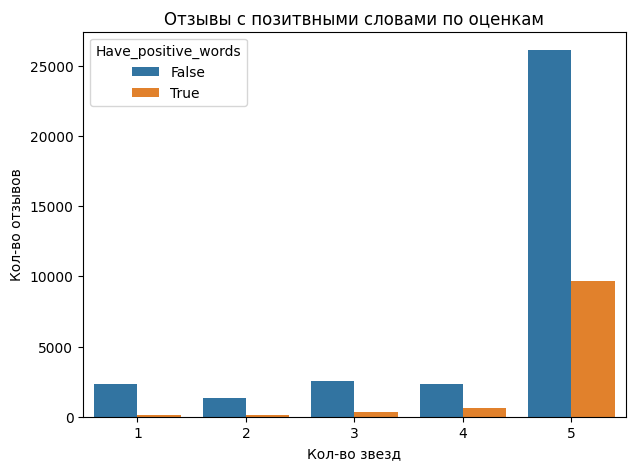

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_review, x='Кол-во звезд', hue='Have_positive_words')
plt.ylabel('Кол-во отзывов')
plt.title('Отзывы с позитвными словами по оценкам')
plt.show()

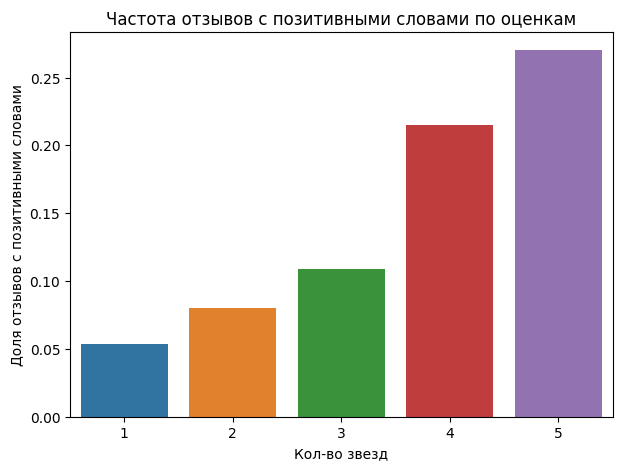

In [46]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_review, x='Кол-во звезд', y='Have_positive_words', estimator='mean', errorbar=None
)
plt.ylabel('Доля отзывов с позитивными словами')
plt.title('Частота отзывов с позитивными словами по оценкам')
plt.show()

- по графикам видно, что отзывы со словами "хорошо" или "отлично" встречаются чаще всего у отзывов с высокой оценкой

Гипотеза 2. Чем ниже оценка, тем чаще в отзыве чаще встречаются слова "плохо" "ужасно"

In [47]:
df_review['Have_negative_words'] = df_review['Текст отзыва'].str.contains("плох|ужасн", regex=True)

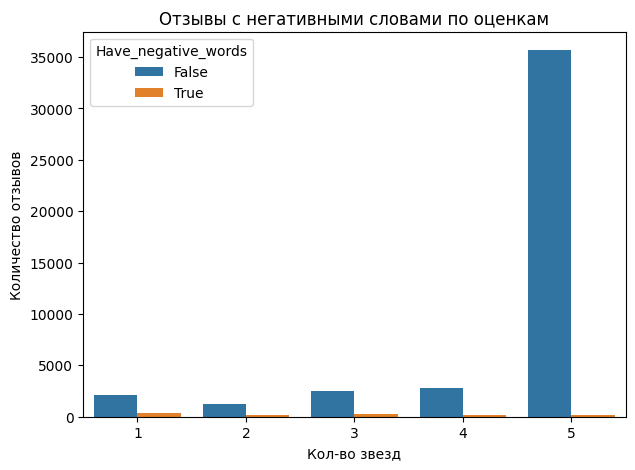

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_review, x='Кол-во звезд', hue='Have_negative_words')
plt.ylabel('Количество отзывов')
plt.title('Отзывы с негативными словами по оценкам')
plt.show()

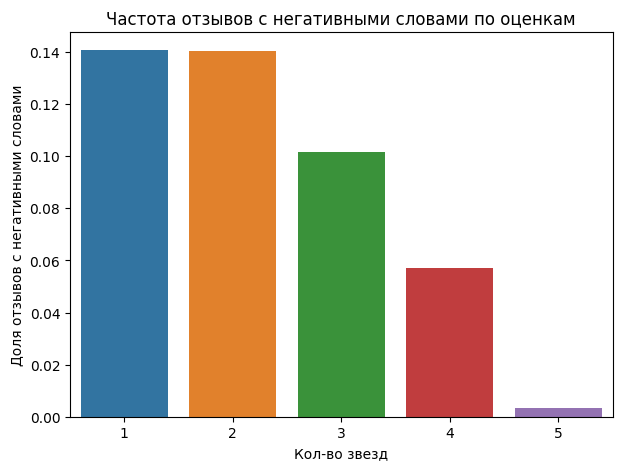

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_review, x='Кол-во звезд', y='Have_negative_words', estimator='mean', errorbar=None
)
plt.ylabel('Доля отзывов с негативными словами')
plt.title('Частота отзывов с негативными словами по оценкам')
plt.show()

- Гипотеза о том, что в отзывах с низкой оценкой чаще встречаются негативные слова - не подтвердилась